# 导入

In [1]:
import numpy as np
import os
import scipy.io as sio
import gc

In [2]:
matFile = []
matFile.append(r'./ExtractedFeatures/1_20131027.mat')
matFile.append(r'./ExtractedFeatures/1_20131030.mat')
matFile.append(r'./ExtractedFeatures/1_20131107.mat')
matFile.append(r'./ExtractedFeatures/2_20140404.mat')
matFile.append(r'./ExtractedFeatures/2_20140413.mat')
matFile.append(r'./ExtractedFeatures/2_20140419.mat')
matFile.append(r'./ExtractedFeatures/3_20140603.mat')
matFile.append(r'./ExtractedFeatures/3_20140611.mat')
matFile.append(r'./ExtractedFeatures/3_20140629.mat')
matFile.append(r'./ExtractedFeatures/4_20140621.mat')
matFile.append(r'./ExtractedFeatures/4_20140702.mat')
matFile.append(r'./ExtractedFeatures/4_20140705.mat')
matFile.append(r'./ExtractedFeatures/5_20140411.mat')
matFile.append(r'./ExtractedFeatures/5_20140418.mat')
matFile.append(r'./ExtractedFeatures/5_20140506.mat')
matFile.append(r'./ExtractedFeatures/6_20130712.mat')
matFile.append(r'./ExtractedFeatures/6_20131016.mat')
matFile.append(r'./ExtractedFeatures/6_20131113.mat')
matFile.append(r'./ExtractedFeatures/7_20131027.mat')
matFile.append(r'./ExtractedFeatures/7_20131030.mat')
matFile.append(r'./ExtractedFeatures/7_20131106.mat')
matFile.append(r'./ExtractedFeatures/8_20140511.mat')
matFile.append(r'./ExtractedFeatures/8_20140514.mat')
matFile.append(r'./ExtractedFeatures/8_20140521.mat')
matFile.append(r'./ExtractedFeatures/9_20140620.mat')
matFile.append(r'./ExtractedFeatures/9_20140627.mat')
matFile.append(r'./ExtractedFeatures/9_20140704.mat')
matFile.append(r'./ExtractedFeatures/10_20131130.mat')
matFile.append(r'./ExtractedFeatures/10_20131204.mat')
matFile.append(r'./ExtractedFeatures/10_20131211.mat')
matFile.append(r'./ExtractedFeatures/11_20140618.mat')
matFile.append(r'./ExtractedFeatures/11_20140625.mat')
matFile.append(r'./ExtractedFeatures/11_20140630.mat')
matFile.append(r'./ExtractedFeatures/12_20131127.mat')
matFile.append(r'./ExtractedFeatures/12_20131201.mat')
matFile.append(r'./ExtractedFeatures/12_20131207.mat')
matFile.append(r'./ExtractedFeatures/13_20140527.mat')
matFile.append(r'./ExtractedFeatures/13_20140603.mat')
matFile.append(r'./ExtractedFeatures/13_20140610.mat')
matFile.append(r'./ExtractedFeatures/14_20140601.mat')
matFile.append(r'./ExtractedFeatures/14_20140615.mat')
matFile.append(r'./ExtractedFeatures/14_20140627.mat')
matFile.append(r'./ExtractedFeatures/15_20130709.mat')
matFile.append(r'./ExtractedFeatures/15_20131016.mat')
matFile.append(r'./ExtractedFeatures/15_20131105.mat')

In [3]:
count=0
SepMatFile = []
temp=[]
for i in matFile:
    temp.append(i)
    if(count % 3 == 2):
        SepMatFile.append(temp)
        temp = []
    count+=1

In [4]:
data = []
for i in SepMatFile:
    singleData = []
    for j in i:
        singleData.append(sio.loadmat(j))  # 读取该目录下的所有.mat文件
    data.append(singleData)

Data: 15(Subjects) $\times$ 3(Experiments/.mat)

In [7]:
data[0][0]['de_movingAve1'].shape

(62, 235, 5)

In [5]:
de_keys = []

for i in range(15):
    de_keys.append('de_LDS' + str(i+1))

In [6]:
print(de_keys)

['de_LDS1', 'de_LDS2', 'de_LDS3', 'de_LDS4', 'de_LDS5', 'de_LDS6', 'de_LDS7', 'de_LDS8', 'de_LDS9', 'de_LDS10', 'de_LDS11', 'de_LDS12', 'de_LDS13', 'de_LDS14', 'de_LDS15']


In [7]:
all_length = []
all_de_exp = []

for i in range(len(data)): # Subject循环
    length = []
    de_exp = []
    for j in range(3): # .mat循环
        temp_length = []
        temp_de_exp = []    

        for k in de_keys: # 实验数循环
            temp_de_exp.append(data[i][j][k])
            temp_length.append(data[i][j][k].shape[1])

        length.append(temp_length)
        de_exp.append(temp_de_exp)
    all_length.append(length)
    all_de_exp.append(de_exp)

In [8]:
all_de_exp_arr = np.zeros([15, 3, 15, 62, max(temp_length),5])

In [9]:
for i in range(15):
    for j in range(3):
        for k in range(15):
            tem = all_de_exp[i][j][k]
            all_de_exp_arr[i][j][k] = np.concatenate(
                (tem, np.zeros([62, max(temp_length) - all_length[i][j][k], 5])), axis=1)

# 展平、标签、去0

In [10]:
all_de_exp_arr.shape

(15, 3, 15, 62, 265, 5)

In [11]:
all_de_exp_arr = all_de_exp_arr.swapaxes(-2, -3)
rawShape = all_de_exp_arr.shape
print(rawShape)

(15, 3, 15, 265, 62, 5)


In [16]:
np.save("all_feature_flat", all_de_exp_arr)

In [12]:
de = all_de_exp_arr

In [13]:
de_sub_list = []
for i in range(15):
    de_mat_list = []
    for j in range(3):
        de_trial_list = []
        for k in range(15):
            zero_index = []
            for m in range(265):
                if(de[i][j][k][m].sum() == 0):
                    zero_index.append(m)
            de_trial_list.append(np.delete(de[i][j][k], zero_index, axis=0))
        de_mat_list.append(de_trial_list)
    de_sub_list.append(de_mat_list)

In [14]:
for i in range(15):
    os.mkdir("trials/feature/subject_" + str(i))
    for j in range(3):
        os.mkdir("trials/feature/subject_" + str(i) + "/section_" + str(j))

FileExistsError: [Errno 17] File exists: 'trials/feature/subject_0'

In [17]:
# 电极对应到二维矩阵中，可对应map.xlsx中的图看看
for i in range(15):
    for j in range(3):
        for k in range(15):
            nSample = de_sub_list[i][j][k].shape[0]
            de_headMap = np.zeros([nSample, 9, 9, 5])
            for x in range(nSample):  # 样本数循环
                # 0-1行
                de_headMap[x][0][3] = de_sub_list[i][j][k][x][0]
                de_headMap[x][0][4] = de_sub_list[i][j][k][x][1]
                de_headMap[x][0][5] = de_sub_list[i][j][k][x][2]
                de_headMap[x][1][3] = de_sub_list[i][j][k][x][3]
                de_headMap[x][1][5] = de_sub_list[i][j][k][x][4]

                # 2-5行
                for m in range(2, 7):
                    for n in range(9):
                        de_headMap[x][m][n] = de_sub_list[i][j][k][x][(m - 2) * 9 + n + 5]

                # 第7行
                for m in range(1, 8):
                    de_headMap[x][7][m] = de_sub_list[i][j][k][x][m + 49]

                # 第8行
                for m in range(2, 7):
                    de_headMap[x][8][m] = de_sub_list[i][j][k][x][m + 55]
            np.save("trials/feature//subject_" + str(i) + "/section_" + str(j) + "/trial_temp" + str(k), de_headMap)

In [17]:
de_headMap.shape

(206, 9, 9, 5)

In [ ]:
# 设置新的边长
sideLen = 32

In [18]:
from scipy import interpolate

for i in range(15):
    for j in range(3):
        for k in range(15):
            de_headMap = np.load("trials/feature/subject_" + str(i) + "/section_" + str(j) + "/trial_temp" + str(k) + ".npy")
            de_timeFirst = de_headMap.swapaxes(-1, -2).swapaxes(-2, -3)
            deMap_bigger = np.zeros([de_timeFirst.shape[0], 5, sideLen, sideLen])
            for m in range(de_timeFirst.shape[0]):  # 样本数循环
                for n in range(5):  # 频率循环
                    x = np.arange(9)
                    y = np.arange(9)
                    z = de_timeFirst[m][n]  # 取出每一个平面

                    f = interpolate.interp2d(x, y, z, kind='cubic')  # cubic为三次
                    xnew = np.linspace(0, 8, sideLen)
                    ynew = np.linspace(0, 8, sideLen)
                    deMap_bigger[m][n] = f(xnew, ynew)
            np.save("trials/feature/subject_" + str(i) + "/section_" + str(j) + "/trial_interpolated_" + str(k) + ".npy", deMap_bigger)

In [19]:
# 标准化
#sample * time * 32 * 32
for i in range(15):
    for j in range(3):
        for k in range(15):
            eegMap = np.load("trials/feature/subject_" + str(i) + "/section_" + str(j) + "/trial_interpolated_" + str(k) + ".npy")
            for m in range(eegMap.shape[0]):
                for n in range(eegMap.shape[1]):
                    eegMap[m][n] = eegMap[m][n] - eegMap[m][n].mean()

            for m in range(eegMap.shape[0]):
                for n in range(eegMap.shape[1]):
                    eegMap[m][n] = eegMap[m][n] / eegMap[m][n].std()

            # 换轴
            eegMap = eegMap.swapaxes(1, 2).swapaxes(2, 3)

            #添加维度
            raw_shape = list(eegMap.shape)
            raw_shape.append(1)

            eegMap = eegMap.reshape(raw_shape)

            # 降低精度为单精度（float32）
            dt = np.dtype(np.float32)
            eegMap = np.array(eegMap, dtype=dt)
            np.save("trials/feature/subject_" + str(i) + "/section_" + str(j) + "/trial_" + str(k) + ".npy", eegMap)

# DE

In [58]:
de = np.load('./de_flat.npy')

In [59]:
#inputShape = 15 * nSample * 62(channel) * 5(freqBand)
#MapShape = 15 * nSample * 100(freq) * (9*9)
freqBand = 5

nSample = de.shape[1]
de_headMap = np.zeros([15, nSample, 9, 9, freqBand])

In [60]:
print(nSample)

10182


In [61]:
# 电极对应到二维矩阵中，可对应map.xlsx中的图看看
for i in range(15):
    for j in range(nSample):  # 样本数循环
        # 0-1行
        de_headMap[i][j][0][3] = de[i][j][0]
        de_headMap[i][j][0][4] = de[i][j][1]
        de_headMap[i][j][0][5] = de[i][j][2]
        de_headMap[i][j][1][3] = de[i][j][3]
        de_headMap[i][j][1][5] = de[i][j][4]

        # 2-5行
        for m in range(2, 7):
            for k in range(9):
                de_headMap[i][j][m][k] = de[i][j][(m - 2) * 9 + k + 5]

        # 第7行
        for m in range(1, 8):
            de_headMap[i][j][7][m] = de[i][j][m + 49]

        # 第8行
        for m in range(2, 7):
            de_headMap[i][j][8][m] = de[i][j][m + 55]

In [62]:
de_headMap.shape

(15, 10182, 9, 9, 5)

Trail: 4357  Freq = 5.0Hz


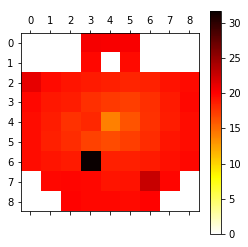

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import random

freqFirst = de_headMap.swapaxes(2, 4).swapaxes(3, 4)

randTr = random.randint(1, de_headMap.shape[1])
randTime = random.randint(0, 5)

arr = freqFirst[0][0][randTime]

print('Trail: ' + str(randTr) + '  Freq = ' + str(randTime * 2.5) + 'Hz')
plt.matshow(arr, cmap='hot_r')
plt.colorbar()
plt.show()

In [65]:
print(de_headMap.shape)
np.save('SEED_feature_de-map_sepe',de_headMap)

(15, 10182, 9, 9, 5)


# 三次样条插值

In [66]:
de_map = np.load('./SEED_feature_de-map_sepe.npy')

In [67]:
# 设置新的边长
sideLen = 32

In [68]:
de_freqFirst = de_map.swapaxes(3, 4).swapaxes(2, 3)

In [69]:
de_freqFirst.shape

(15, 10182, 5, 9, 9)

In [70]:
from scipy import interpolate

deMap = np.zeros([15, de_freqFirst.shape[1], 5, sideLen, sideLen])

for i in range(15):
    for j in range(de_freqFirst.shape[1]):  # 样本数循环
        for k in range(5):  # 频率循环
            x = np.arange(9)
            y = np.arange(9)
            z = de_freqFirst[i][j][k]  # 取出每一个平面

            f = interpolate.interp2d(x, y, z, kind='cubic')  # cubic为三次
            xnew = np.linspace(0, 8, sideLen)
            ynew = np.linspace(0, 8, sideLen)
            deMap[i][j][k] = f(xnew, ynew)

In [71]:
# 标准化
#sample * time * 32 * 32
for i in range(deMap.shape[0]):
    for j in range(deMap.shape[1]):
        for k in range(deMap.shape[2]):
            deMap[i][j][k] = deMap[i][j][k] - deMap[i][j][k].mean()

for i in range(deMap.shape[0]):
    for j in range(deMap.shape[1]):
        for k in range(deMap.shape[2]):
            deMap[i][j][k] = deMap[i][j][k] / deMap[i][j][k].std()

# 换轴
deMap = deMap.swapaxes(2, 3).swapaxes(3, 4)

In [72]:
deMap.shape

(15, 10182, 32, 32, 5)

In [74]:
temMap.shape

(15, 10182, 5, 32, 32)

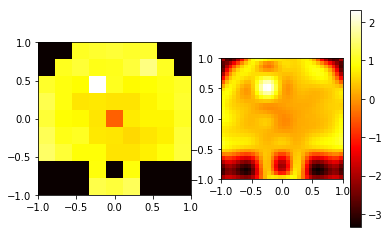

In [75]:
temMap = deMap.swapaxes(3, 4).swapaxes(2, 3)

import pylab as pl
import matplotlib as mpl

%matplotlib inline
pl.subplot(121)
im1 = pl.imshow(de_freqFirst[0][0][0], extent=[-1, 1, -1, 1],
                cmap=mpl.cm.hot, interpolation='nearest', origin="lower")

pl.subplot(122)
im2 = pl.imshow(temMap[0][0][4], extent=[-1, 1, -1, 1],
                cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im2)

pl.show()

del temMap

In [76]:
raw_shape = list(deMap.shape)
raw_shape.append(1)

deMap = deMap.reshape(raw_shape)

In [77]:
deMap.shape

(15, 10182, 32, 32, 5, 1)

In [78]:
# 降低精度为单精度（float32）
dt = np.dtype(np.float32)
deMap = np.array(deMap, dtype=dt)

# 导出
np.save('./single/SEED_feature_DE_map_sepe', deMap)